In [1]:
#DATA ANALYSIS PPROJECT BY PALAK GUPTA
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("bigdatamart_Train.csv")

In [3]:
data.shape

(8523, 12)

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [8]:
#Converting these categories into two
data['Item_Fat_Content']=data['Item_Fat_Content'].replace("LF","Low Fat")
data['Item_Fat_Content']=data['Item_Fat_Content'].replace("low fat","Low Fat")
data['Item_Fat_Content']=data['Item_Fat_Content'].replace("reg","Regular")

In [9]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

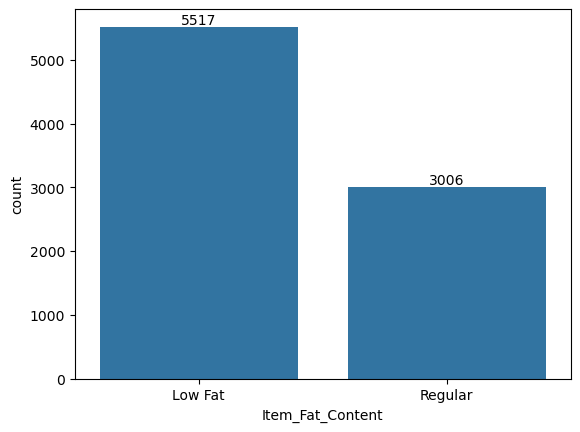

In [10]:
label=sns.countplot(x="Item_Fat_Content",data=data)
for i in label.containers:
    label.bar_label(i)

<Axes: ylabel='count'>

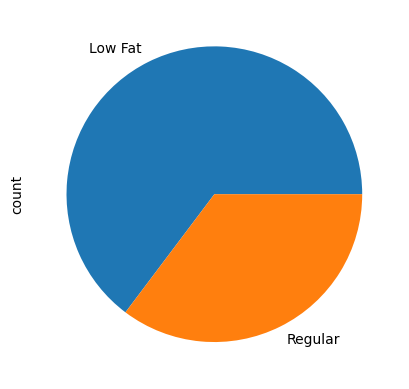

In [11]:
#1.Easy way to create a normal pie chart 
data["Item_Fat_Content"].value_counts().plot(kind="pie")

In [12]:
data_pie=data["Item_Fat_Content"].value_counts().index

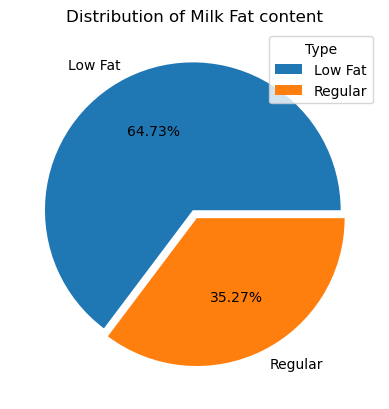

In [18]:
#2. Ceeate a detailed pie chart
#plt.figure(figsize=(6,6))
plt.pie(data["Item_Fat_Content"].value_counts(),labels=data_pie,autopct='%1.2f%%',explode=(0.03,0.03))
plt.title("Distribution of Milk Fat content")
plt.legend(title="Type",loc="upper right") #Adding legend in upper-right corner
plt.show()

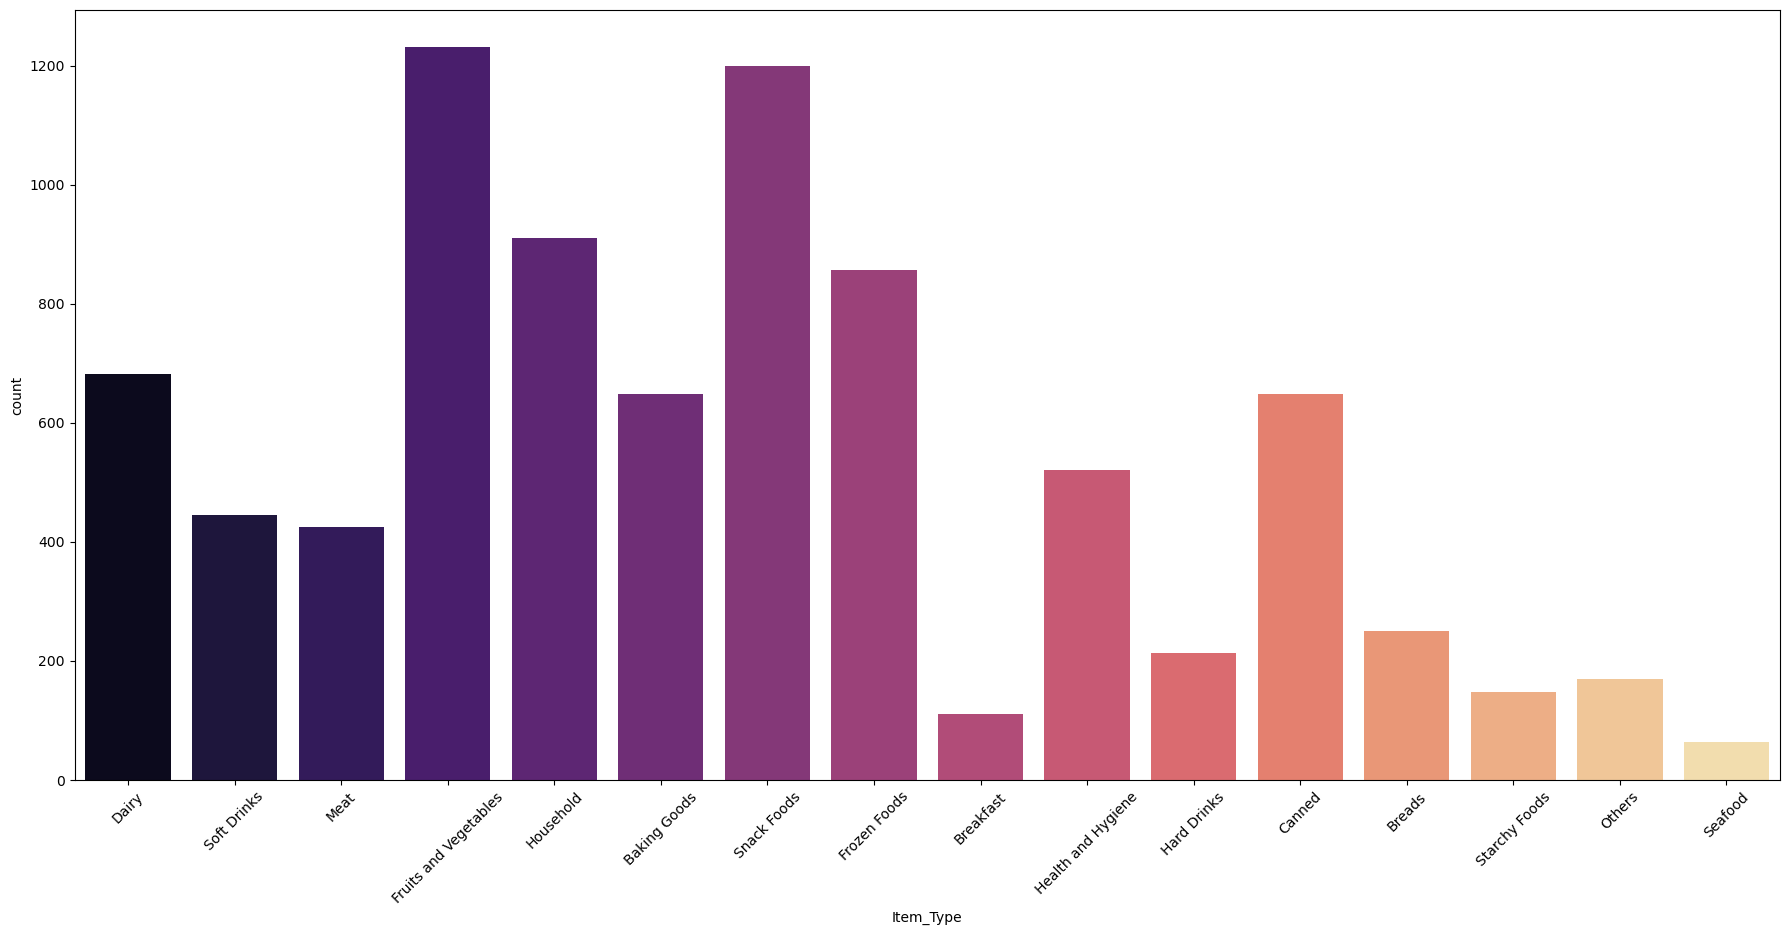

In [19]:
#Item Type & Item Identifier

plt.figure(figsize=(22,10))
sns.countplot(x=data['Item_Type'],palette='magma')
plt.xticks(rotation=45)
plt.show()

In [20]:
#Item type combine:

data['Item_Type_Combination']=data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combination']=data['Item_Type_Combination'].map({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})
data["Item_Type_Combination"].value_counts()

Item_Type_Combination
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [21]:
#Findind the data for NC items
data.loc[data["Item_Type_Combination"]=="Non-Consumable"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combination
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable
16,NCB42,11.80,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888,Non-Consumable
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672,Non-Consumable
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,Non-Consumable
31,NCS17,18.60,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8500,NCQ42,20.35,Low Fat,0.000000,Household,125.1678,OUT017,2007,NaN,Tier 2,Supermarket Type1,1907.5170,Non-Consumable
8502,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688,Non-Consumable
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128,Non-Consumable
8516,NCJ19,18.60,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820,Non-Consumable


In [23]:
# Now checking fat content for NC items
data.loc[data["Item_Type_Combination"]=="Non-Consumable","Item_Fat_Content"]

4       Low Fat
16      Low Fat
22      Low Fat
25      Low Fat
31      Low Fat
         ...   
8500    Low Fat
8502    Low Fat
8504    Low Fat
8516    Low Fat
8520    Low Fat
Name: Item_Fat_Content, Length: 1599, dtype: object

In [24]:
#NC items shouldn't have any fat content, so we are replacing it with non edible
data.loc[data["Item_Type_Combination"]=="Non-Consumable","Item_Fat_Content"]="Non-Edible"
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

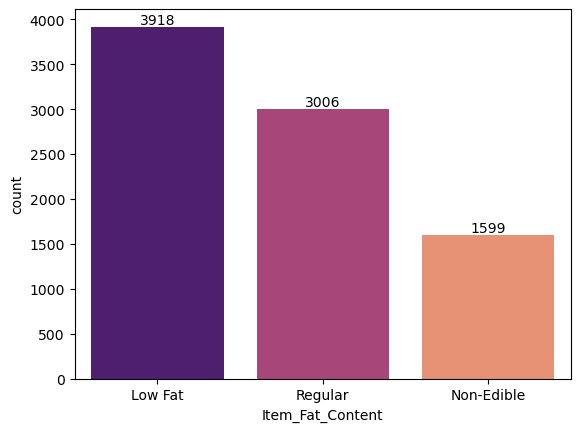

In [25]:
label=sns.countplot(x='Item_Fat_Content',data=data,palette='magma')
for i in label.containers:
    label.bar_label(i)

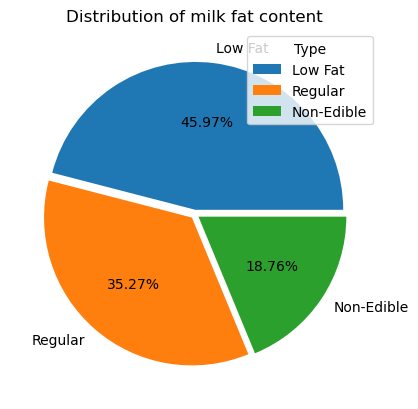

In [26]:
label=data['Item_Fat_Content'].value_counts().index
plt.pie(data['Item_Fat_Content'].value_counts(),labels=label,autopct='%1.2f%%',explode=(0.03,0.03,0.03))
plt.title('Distribution of milk fat content')
plt.legend(title='Type',loc='upper right')
plt.show()

In [27]:
data["Outlet_Identifier"].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

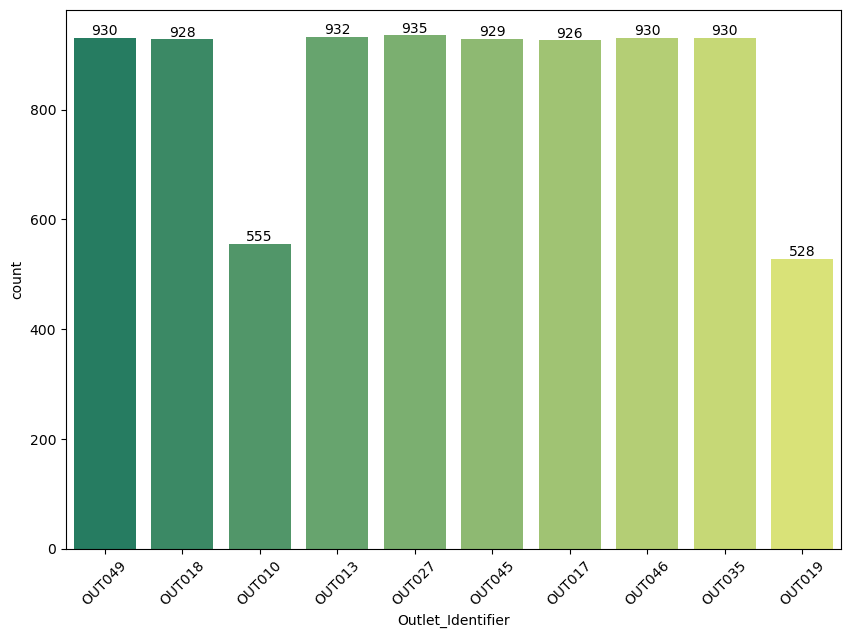

In [29]:
#Countplot
plt.figure(figsize=(10,7))
label=sns.countplot(x=data["Outlet_Identifier"],palette="summer")
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.show()


In [30]:
data["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

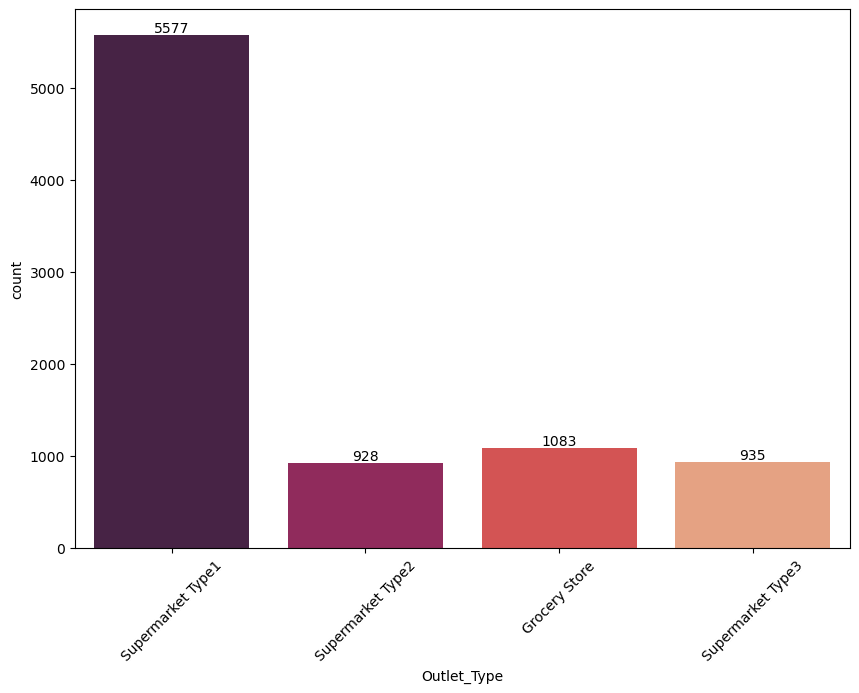

In [32]:
#Countplot
plt.figure(figsize=(10,7))
label=sns.countplot(x=data["Outlet_Type"],palette="rocket")
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.show()


In [33]:
data["Outlet_Location_Type"].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

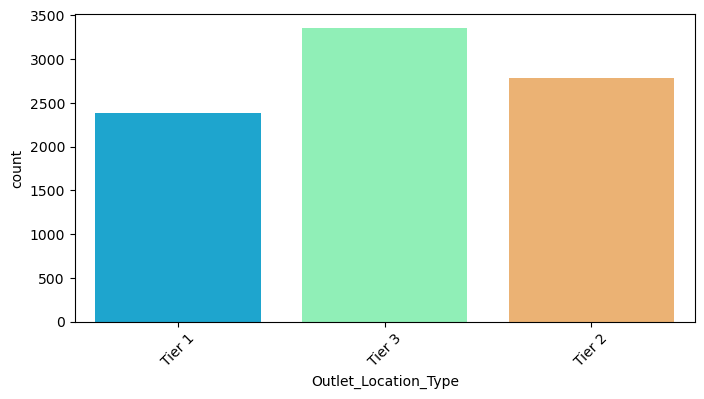

In [35]:
#Countplot
plt.figure(figsize=(8,4))
lable=sns.countplot(x=data["Outlet_Location_Type"],palette="rainbow")
for i in label.containers:
    label.bar_label(i)
    plt.xticks(rotation=45)
plt.show()


In [36]:
#Null values in item weight
data["Item_Weight"].isnull().sum()

1463

In [37]:
data.groupby("Item_Type")["Item_Weight"].value_counts(dropna=False)

Item_Type      Item_Weight
Baking Goods   NaN            112
               9.800           15
               15.500          14
               17.750          14
               9.195           12
                             ... 
Starchy Foods  10.500           3
               14.000           3
               20.500           3
               21.200           3
               18.000           1
Name: count, Length: 1197, dtype: int64

In [38]:
data["Item_Weight"]=data.groupby("Item_Type")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))


In [39]:
#Checking for null values again
data["Item_Weight"].isnull().sum()

0

In [40]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [41]:
#Checking for null values in outlet size
data['Outlet_Size'].isna().sum()

2410

In [42]:
#Filling null values with mode
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)
data['Outlet_Size'].isna().sum()

0

In [43]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

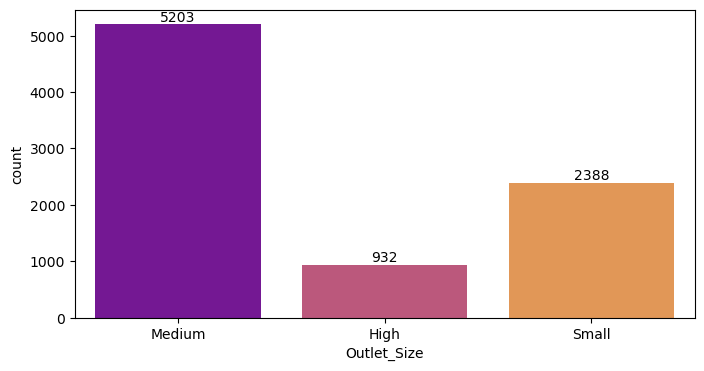

In [44]:
plt.figure(figsize=(8,4))
label=sns.countplot(x=data['Outlet_Size'],palette='plasma')
for i in label.containers:
    label.bar_label(i)
plt.show()

<Axes: xlabel='Outlet_Size', ylabel='count'>

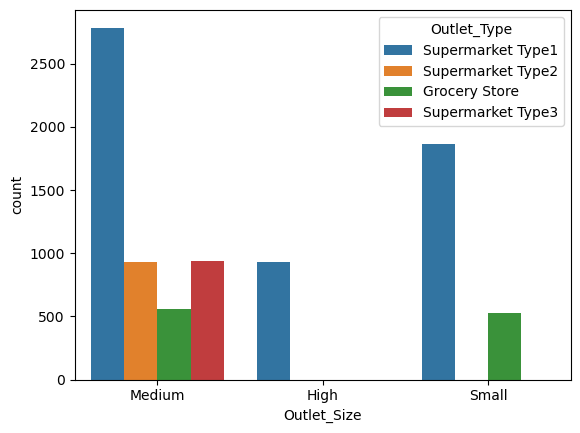

In [45]:
sns.countplot(x='Outlet_Size',hue='Outlet_Type',data=data)

In [46]:
data[data['Item_Visibility']==0]['Item_Identifier'].nunique()

446

In [47]:
data['Item_Visibility']=data['Item_Visibility'].replace(0,np.nan)

In [48]:
data['Item_Visibility'].fillna(data['Item_Visibility'].median(),inplace=True)

In [49]:
data[data['Item_Visibility']==0]['Item_Identifier'].nunique()

0

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

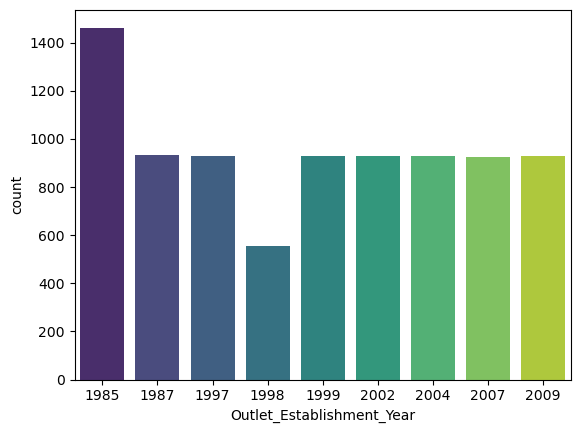

In [50]:
sns.countplot(x=data['Outlet_Establishment_Year'],palette='viridis')

In [51]:
#Calculating the age of outlets
data['Outlet_Age']=data['Outlet_Establishment_Year'].apply(lambda x: 2013-x)
data['Outlet_Age'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Age, dtype: int64

In [52]:
df=data.select_dtypes(exclude='object')

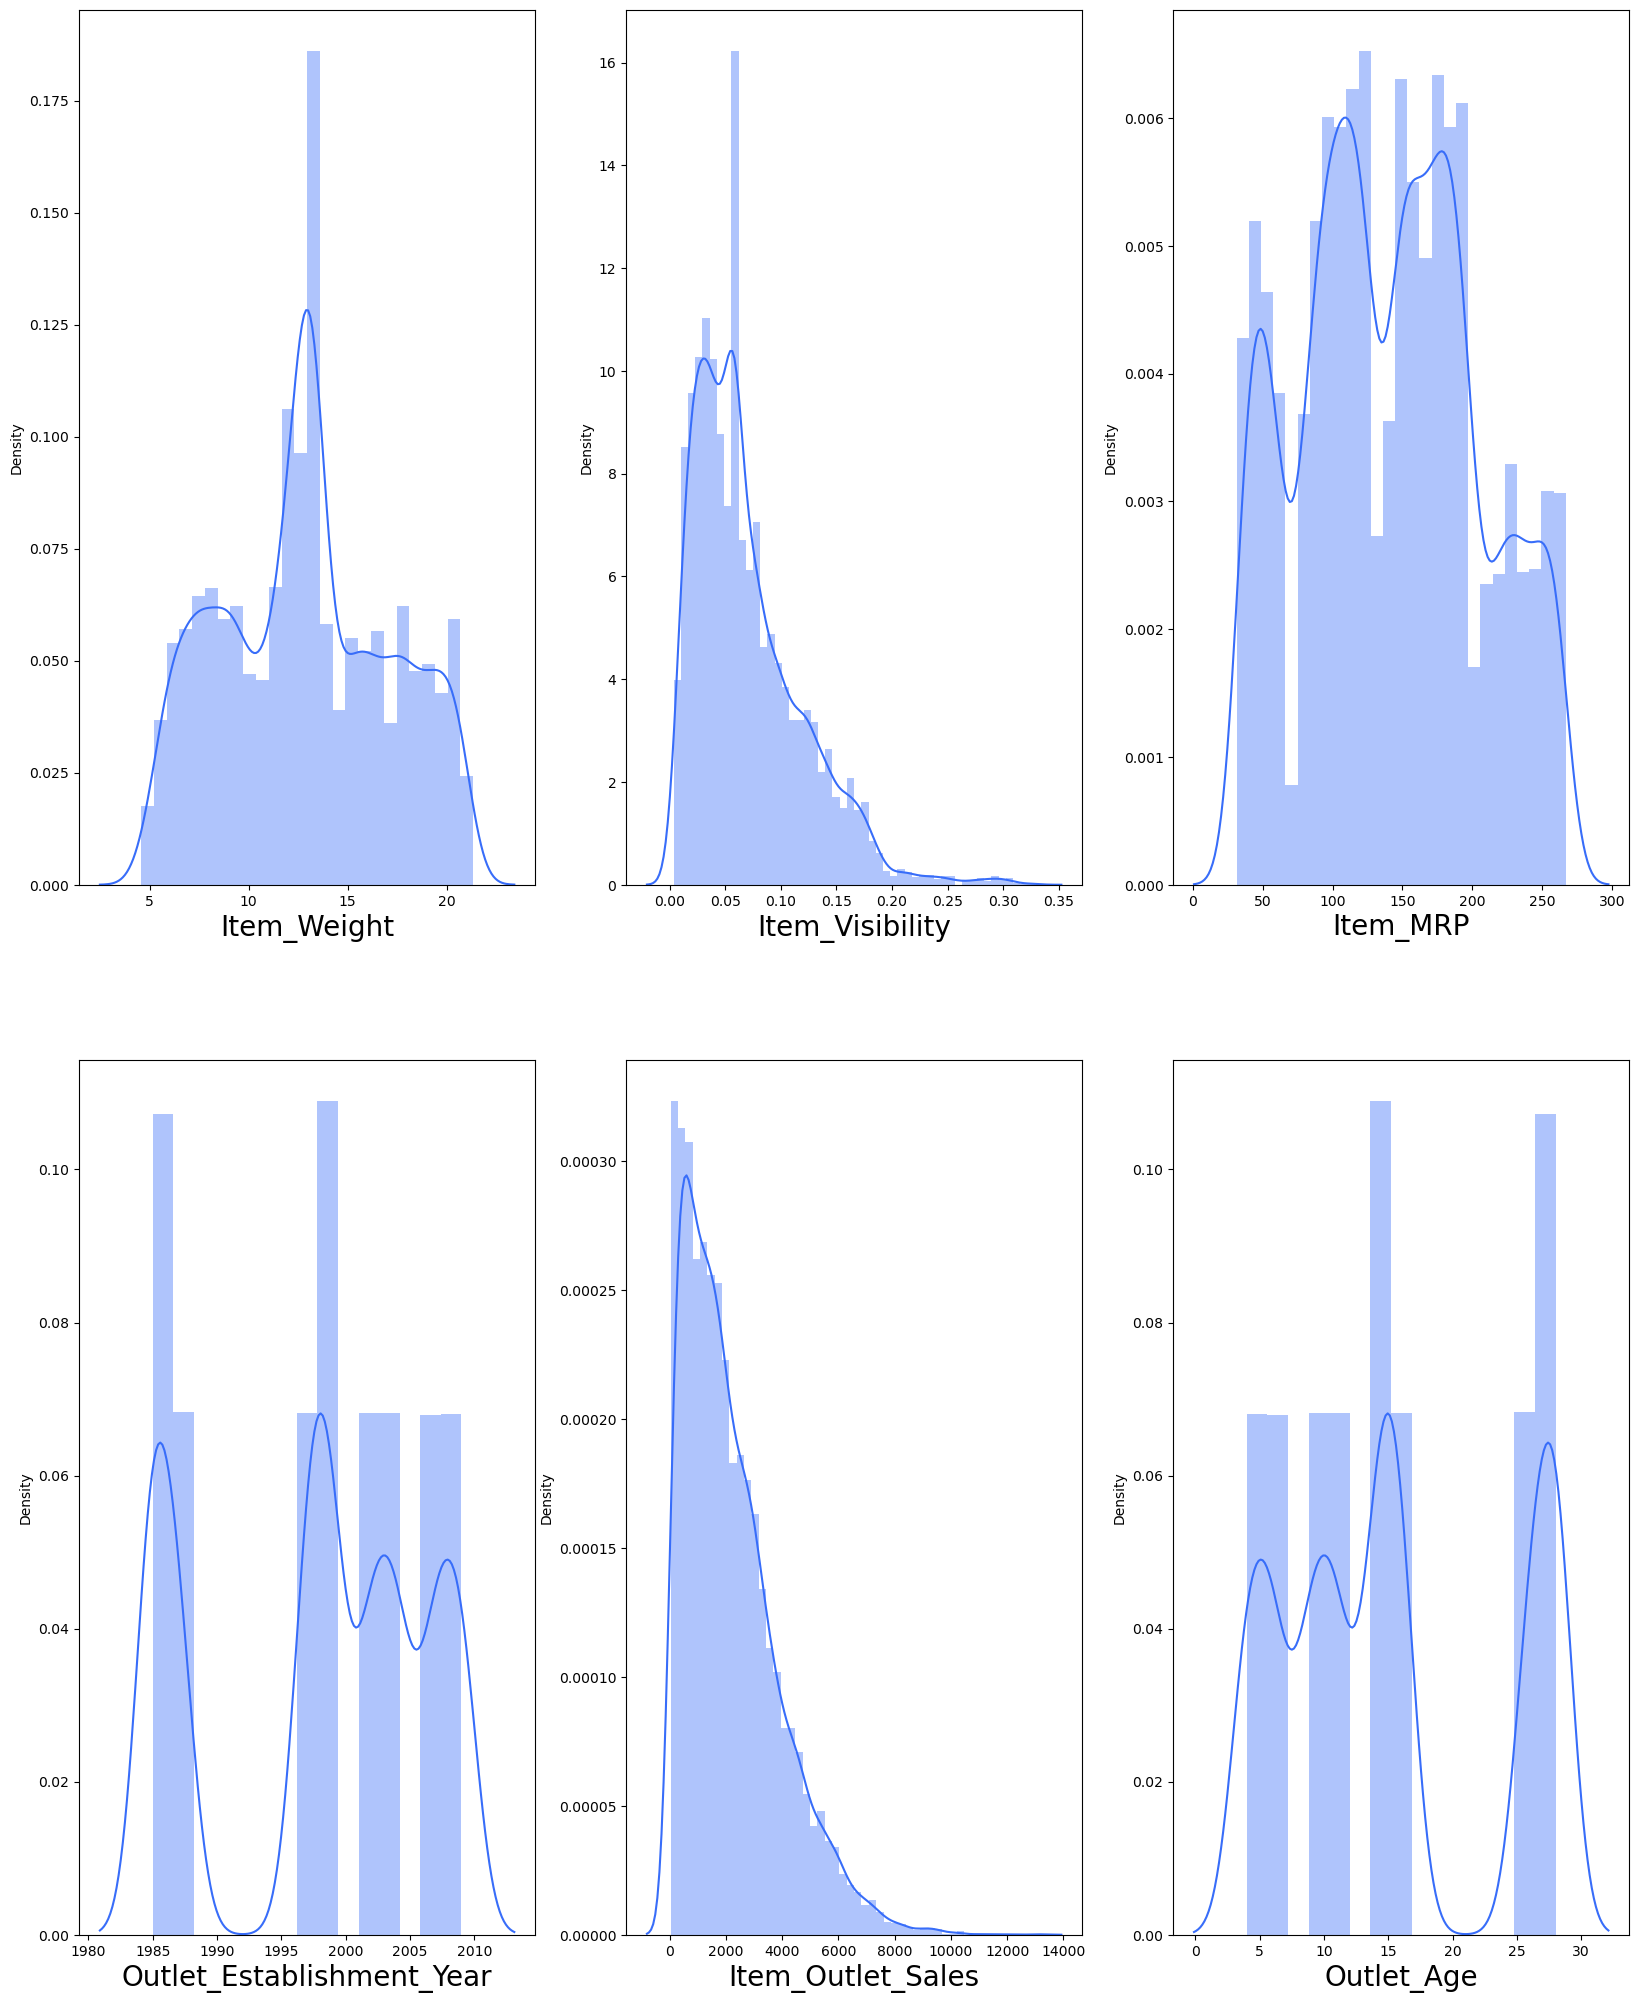

In [53]:
plt.figure(figsize=(20,25),facecolor='white')
sns.set_palette('rainbow')
plotnumber=1
for column in df:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()

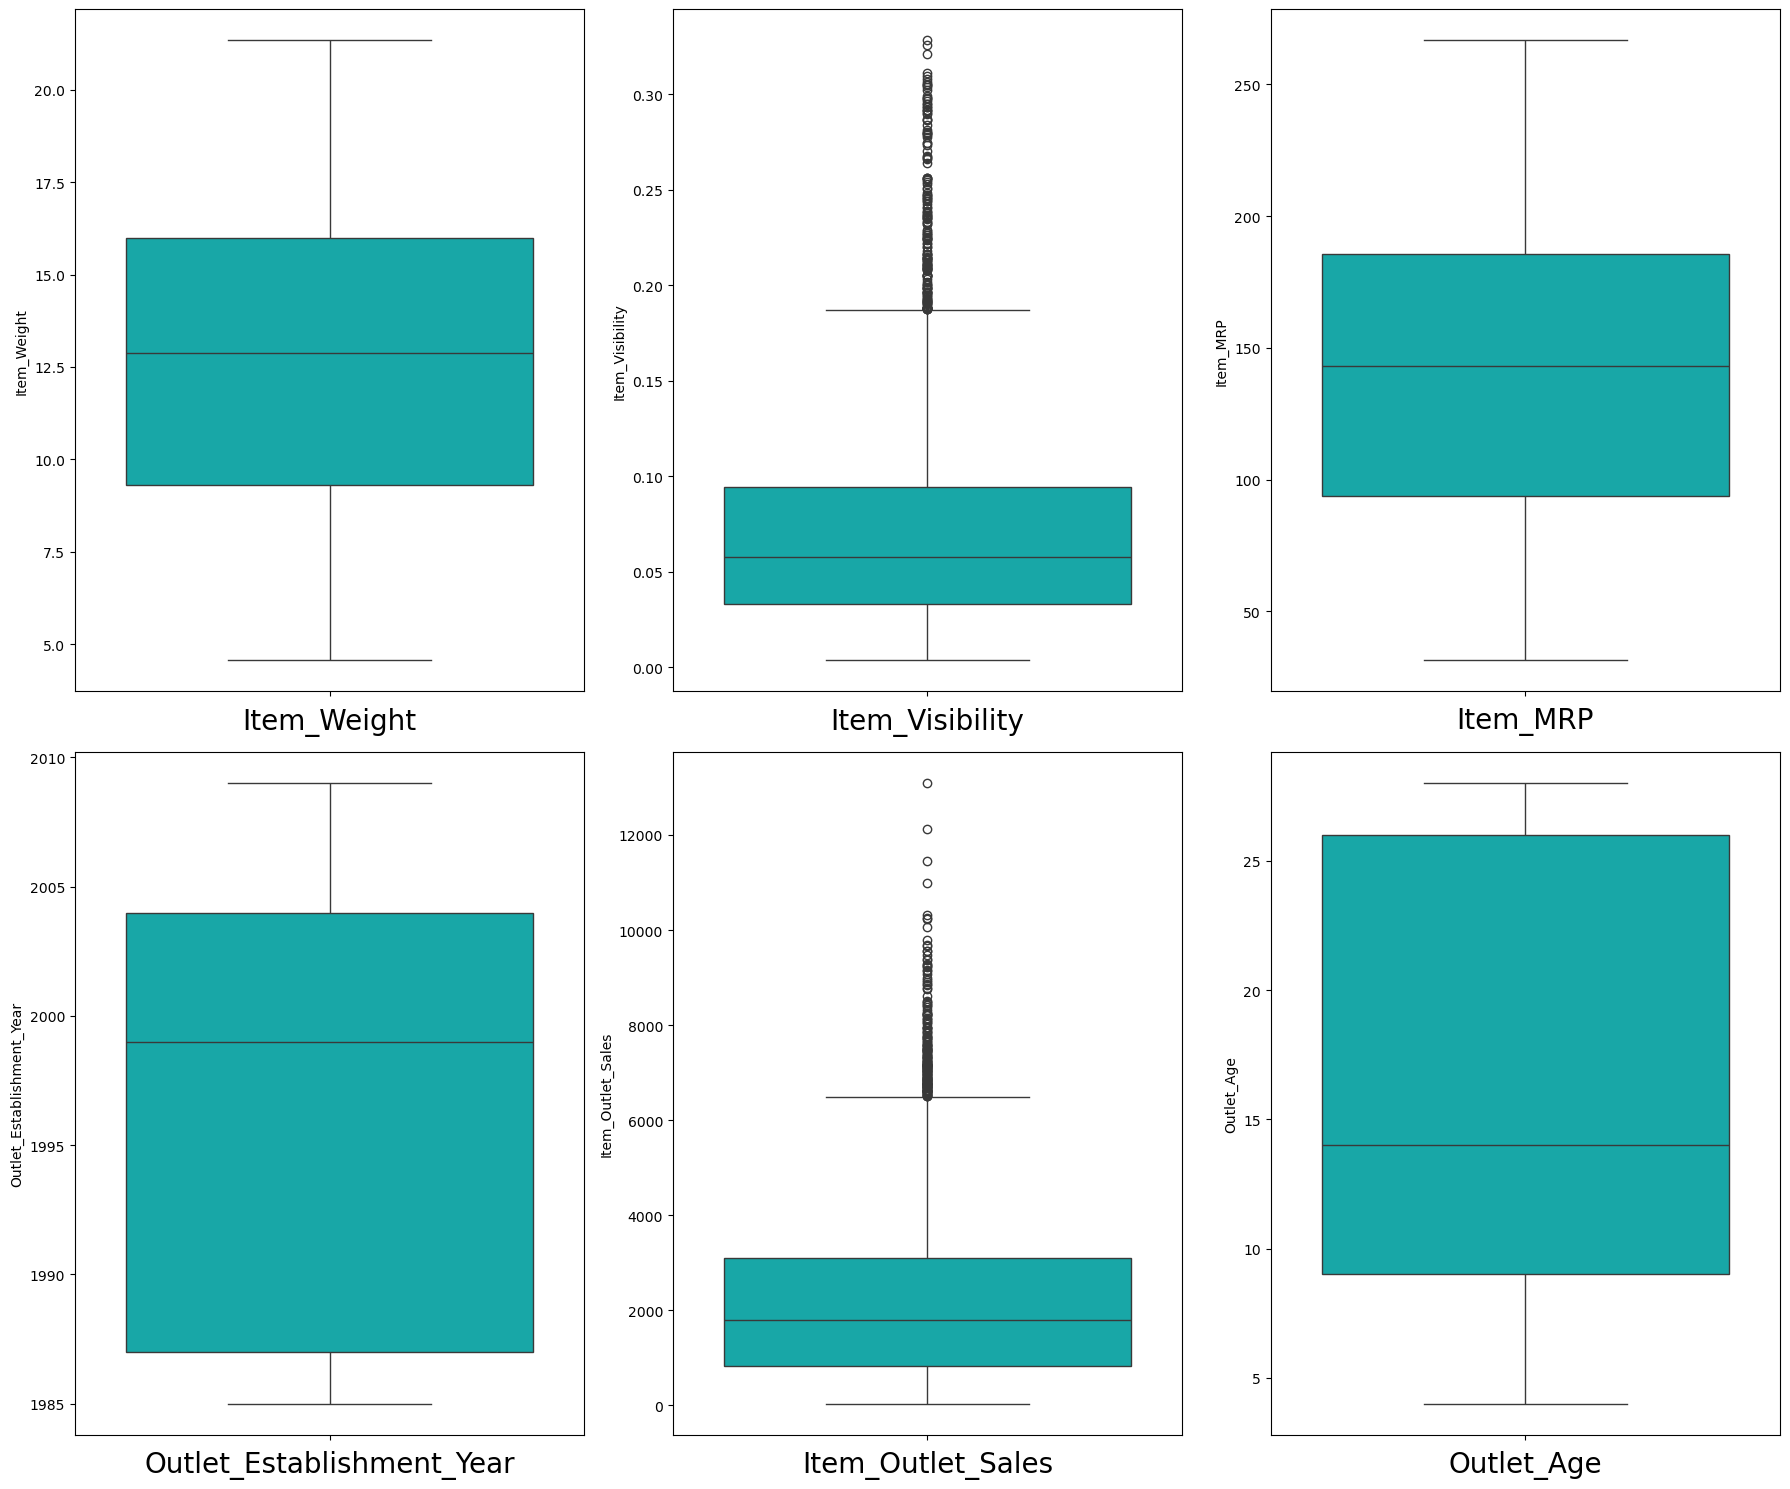

In [54]:
#Box plot
plt.figure(figsize=(18,15),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.tight_layout()
plt.show()

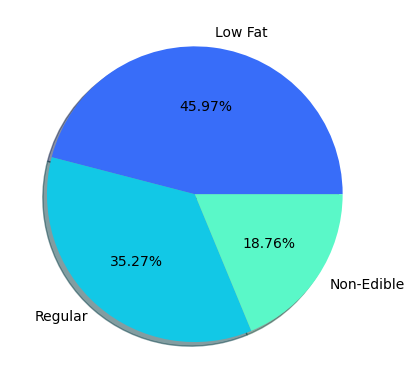

In [55]:
labels='Low Fat','Regular','Non-Edible'
gig,ax=plt.subplots()
ax.pie(data.Item_Fat_Content.value_counts(),labels=labels,radius=1,autopct='%1.2f%%',shadow=True)
plt.show()

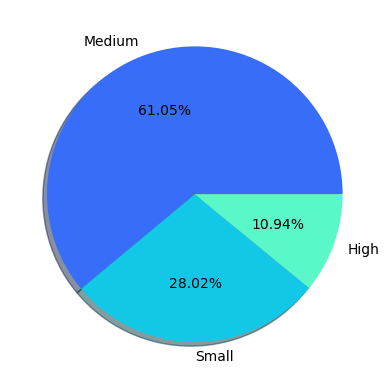

In [56]:
labels='Medium','Small','High'
fig,ax=plt.subplots()
ax.pie(data.Outlet_Size.value_counts(),labels=labels,autopct='%1.2f%%',shadow=True,radius=1)
plt.show()


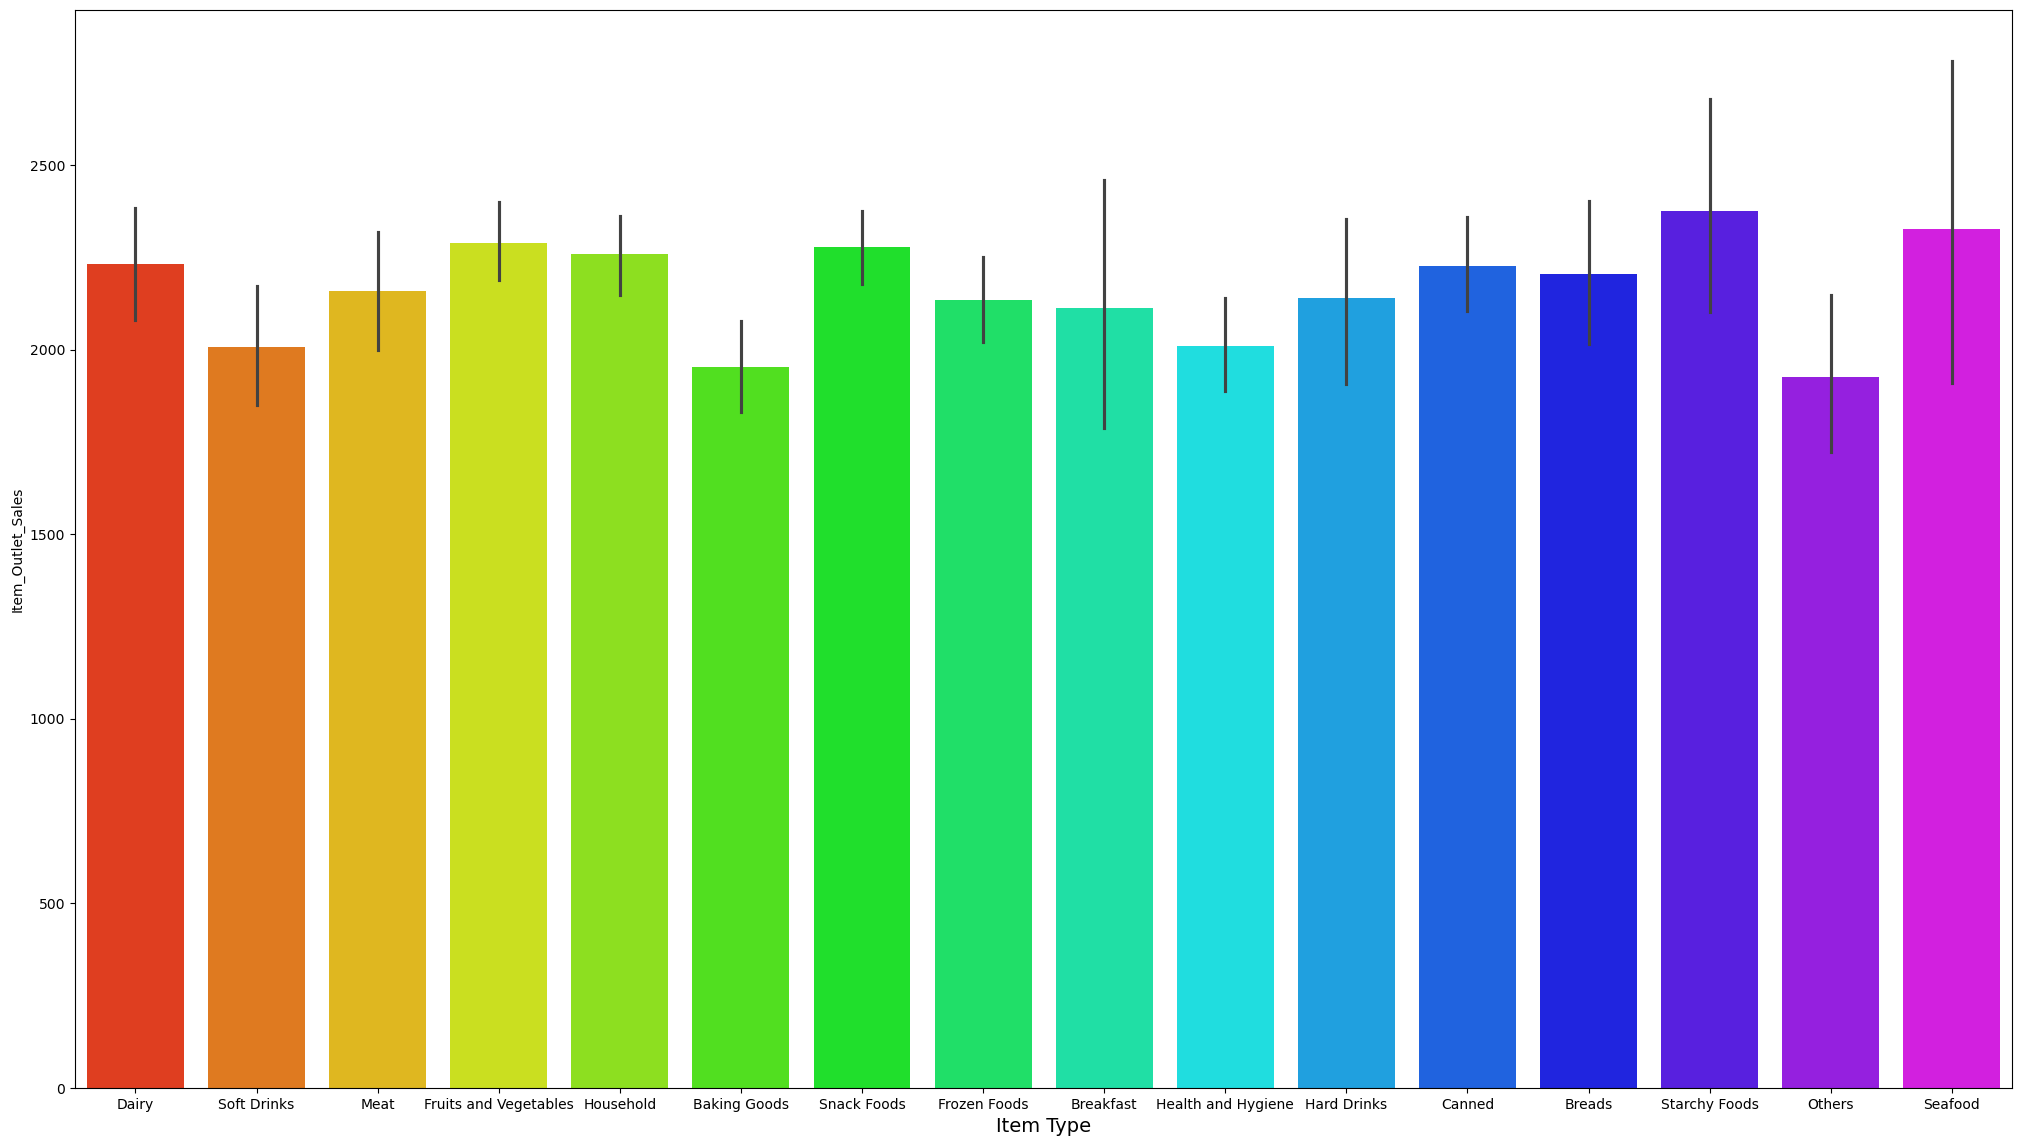

In [57]:
#Barplot of item type vs sales
plt.figure(figsize=(25,14))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=data,palette='gist_rainbow')
plt.xlabel('Item Type',fontsize=14)
plt.show()
